#Project Overview

##  Project Introduction

### **This notebook is made for the Global AI Hub Akbank Machine Learning Bootcamp Project and is made by Lokman Efe. The project is about predicting Melbourne house prices.**

### **Link for the dataset: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market**

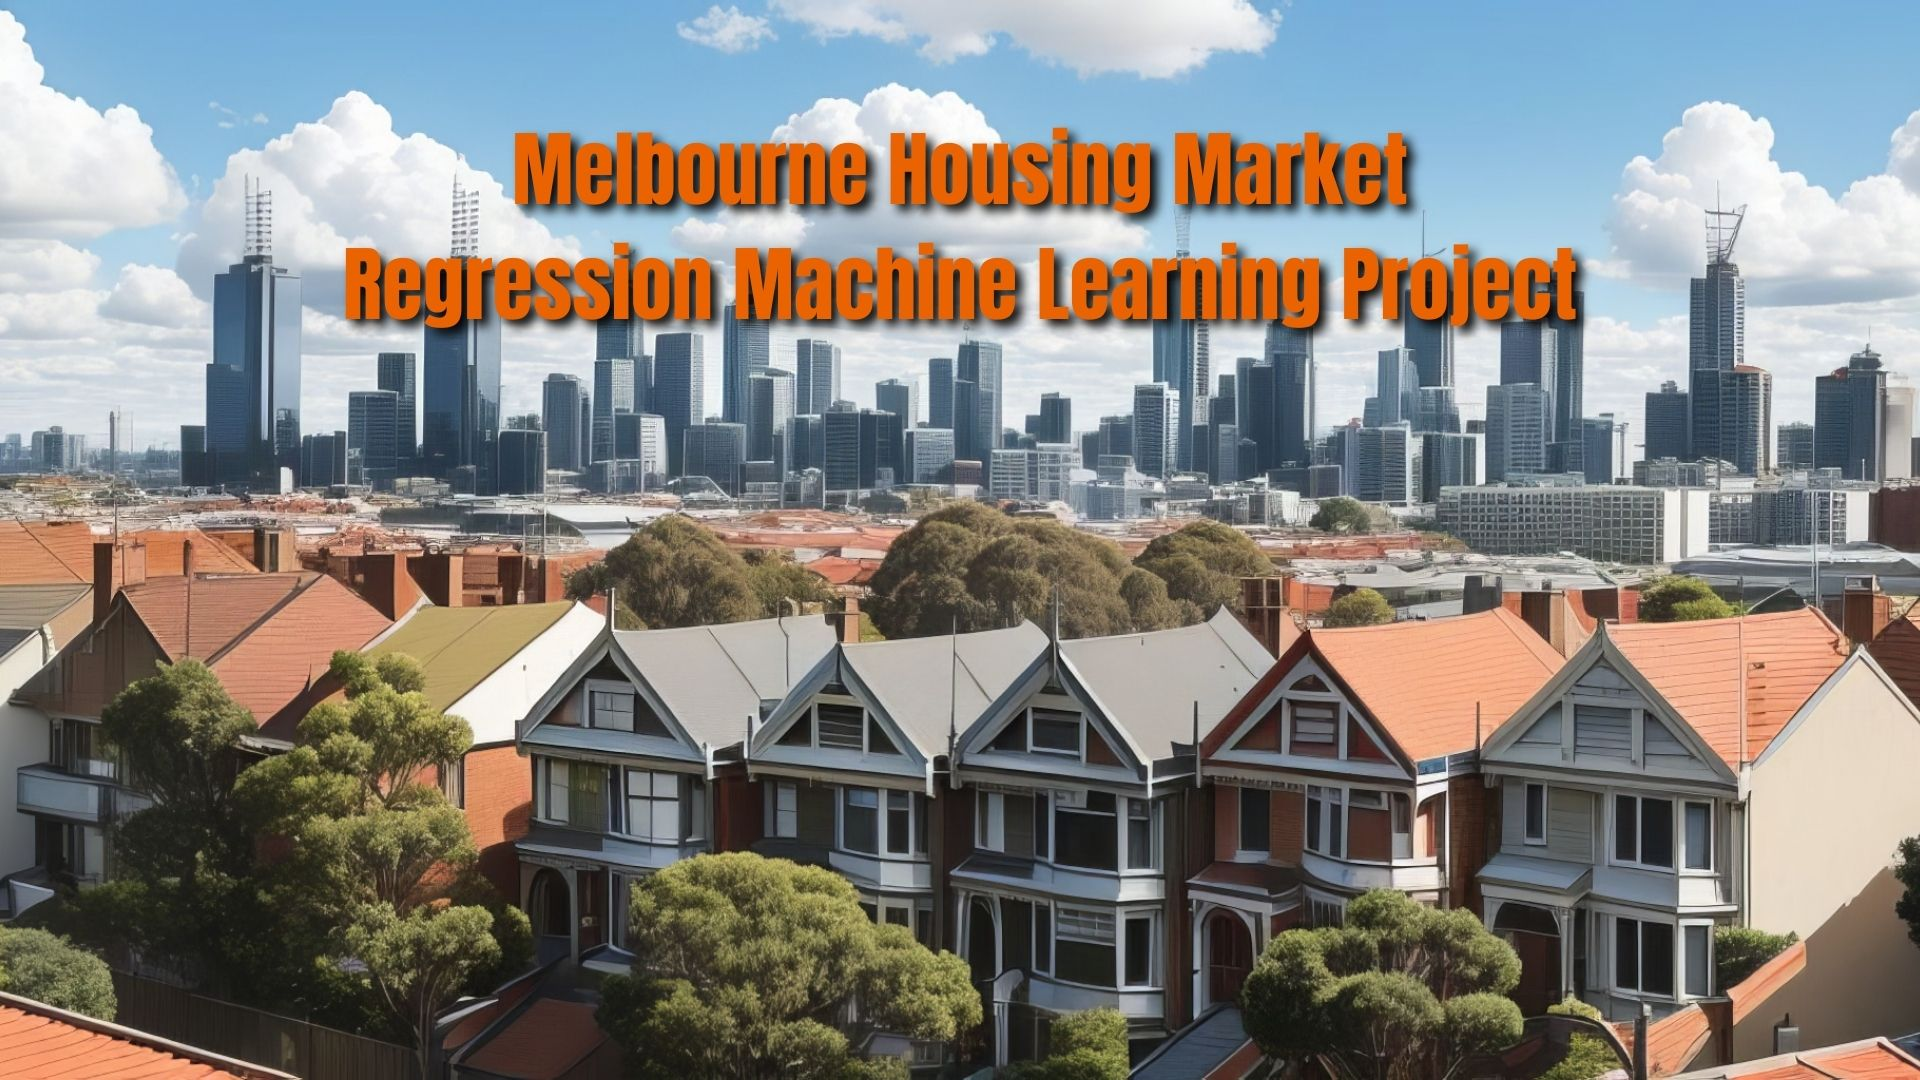

### **The photo is generated by me, using Stable Diffusion with dreamShaper_v6.**

**Details:**

Positive prompt: Melbourne houses, nearly bird view, from far away, houses are flats, nice cloudy sunny sky, trees, birds flying in the air, people wandering on the streets and cars on the roads, there are red water pipes and post boxes, there are multiple but low count skyscrapers near and far away, city is not very big

Negative prompt:  bad-hands-5 BadDream badhandv4 easynegative FastNegativeEmbedding No512-neg imagesharpener happy512 UnrealisticDream

Steps: 40, Sampler: Euler a, CFG scale: 7, Seed: 73190335, Size: 1024x512, Model hash: c249d7853b, Model: dreamshaper_6BakedVae, TI hashes: "bad-hands-5: aa7651be154c, BadDream: 758aac443515, badhandv4: 5e40d722fc3d, easynegative: c74b4e810b03, FastNegativeEmbedding: 687b669d8234, No512-neg: b79ad383cb4f, imagesharpener: fe5a4dfc4a76, happy512: 4fa643103a06, UnrealisticDream: a77451e7ea07", Version: v1.6.0

Enhanced 2x with Topaz Photo AI

Edited with Canva





###Project Definition


For this project, we need to load the Melbourne Housing dataset into our project. The
quality and amount of data we collect will determine how good our predictive model
can be. For this reason, we need to examine the dataset very carefully. We will
estimate the price of a house using the Melbourne Housing dataset, which is a
real-life example. Before evaluating any cost, we will start by analyzing the data
using preprocessing techniques. We will then build our models and measure their
performance to complete the project.

### Information about the data

Melbourne is the capital and largest city of the Australian state of Victoria, and the
second-most populous city in both Australia and Oceania. The dataset contains several
attributes of the houses in Melbourne along with their prices.

The variables in the data set:
* Suburb
* Address
* Rooms: Number of rooms
* Price: Price in Australian dollars, target variable
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;
SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after
auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site -
development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude
* Longtitude




# Imports and Options

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats import zscore

import warnings

# setting pandas to show all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ignoring "FutureWarning"
warnings.filterwarnings("ignore", category=FutureWarning)

# First look at the data

We will read the data set and examine the first 5 rows.

In [57]:
df = pd.read_csv("/content/data.csv")

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Let's look at the shape of the dataset and types of the variables.

In [58]:
print(f"Shape of the dataset: {df.shape}\n34857 Rows and 21 Columns\n\n")

print(f"Data types of the variables(columns)\n{df.dtypes}")

df.describe().T

Shape of the dataset: (34857, 21)
34857 Rows and 21 Columns


Data types of the variables(columns)
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Let's see memory usage and range index.

In [87]:
memory_usage = df.memory_usage(deep=True)
print(f"Memory Usage: {memory_usage}")

range_index = df.index
print(f"\n\nRange Index:{range_index}")

Memory Usage: Index            335328
Suburb           593748
Address          625441
Rooms             71096
Type             515446
Price             71096
Method           518731
SellerG          562457
Date             592828
Distance          71096
Postcode          71096
Bedroom2          71096
Bathroom          71096
Car               71096
Landsize          71096
BuildingArea      71096
YearBuilt         71096
CouncilArea      699697
Lattitude         71096
Longtitude        71096
Regionname       691282
Propertycount     71096
dtype: int64


Range Index:Int64Index([    2,     4,     6,    11,    14,    18,    24,    25,    30,
               32,
            ...
            34826, 34828, 34831, 34836, 34837, 34847, 34849, 34853, 34854,
            34856],
           dtype='int64', length=8887)


# Exploratory Data Analysis (EDA)

Let's grab a hold of our variables by their data types.


In [59]:
def grab_col_names(df, cat_th=7, car_th=20):
    """
    Returns the names of categorical, numeric, and categorical cardinal variables in the dataset.
    Note: Numeric variables with a categorical appearance are also included in the categorical variables.

    Parameters
    ------
        df: DataFrame
                The DataFrame for which variable names are to be retrieved.
        cat_th: int, optional
                Class threshold value for numeric but categorical variables.
        car_th: int, optional
                Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variables.
        num_cols: list
                List of numeric variables.
        cat_but_car: list
                List of categorical variables that appear to be cardinal.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = the total number of variables.
        num_but_cat is included in cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables: cat_cols + num_cols + cat_but_car = the number of variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations(Rows): {df.shape[0]}")
    print(f"Variables(Columns): {df.shape[1]}\n")
    print(f'cat_cols: {len(cat_cols)}\nnum_cols: {len(num_cols)}\ncat_but_car: {len(cat_but_car)}\nnum_but_cat: {len(num_but_cat)}')
    print(f"\ncat_cols: {cat_cols}\nnum_cols: {num_cols}\ncat_but_car: {cat_but_car}\n")

    print(f"\ncat_cols data types:\n\n{df[cat_cols].dtypes}\n\nnum_cols data types:\n\n{df[num_cols].dtypes}\n\ncat_but_car data types:\n\n{df[cat_but_car].dtypes}")

    return cat_cols, num_cols, cat_but_car

grab_col_names() makes us get hold of our variables by their data type. Let's use it.

In [60]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Rows): 34857
Variables(Columns): 21

cat_cols: 3
num_cols: 13
cat_but_car: 5
num_but_cat: 0

cat_cols: ['Type', 'Method', 'Regionname']
num_cols: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
cat_but_car: ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']


cat_cols data types:

Type          object
Method        object
Regionname    object
dtype: object

num_cols data types:

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

cat_but_car data types:

Suburb         object
Address        object
SellerG        object
Date           object
CouncilArea    object
dtype: object


## Missing Values

Let's take a look at missing values.
We must check for duplicate data and remove duplicates.




In [61]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We will fill the categorical variables with their modes.


In [62]:
df.drop_duplicates(inplace=True)

for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode().iloc[0])

Let's drop the remaining missing values.

In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## Outlier Detection
While implementing EDA, we must look for outliers in the numerical variables.

 This function takes numerical columns as input and checks if there are outliers in the variable by their z-score.


Z-score is calculated like this:

    z = data point - mean standard deviation

Let's implement the function.

In [65]:
def check_outlier(df, col_name, threshold=3):
    """
    Check for outliers in a DataFrame column using the z-score method.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - col_name: str
        The name of the column to check for outliers.
    - threshold: int or float (default=3)
        The z-score threshold to identify outliers.

    Returns:
    - bool
        True if outliers are detected, False otherwise.
    """
    # Calculate the z-scores
    z_scores = (df[col_name] - df[col_name].mean()) / df[col_name].std()

    # Check for outliers based on the threshold
    if (np.abs(z_scores) > threshold).any():
        return True
    else:
        return False

Let's analyze our variables for outliers.

In [66]:
for col in num_cols:
  print(col, check_outlier(df, col))

Rooms True
Price True
Distance True
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
Lattitude True
Longtitude True
Propertycount True


It seems like all of our variables have outliers. We can visualize num_cols to see them.

count    8887.000000
mean        3.098909
std         0.963786
min         1.000000
5%          2.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         4.000000
95%         5.000000
99%         5.000000
max        12.000000
Name: Rooms, dtype: float64


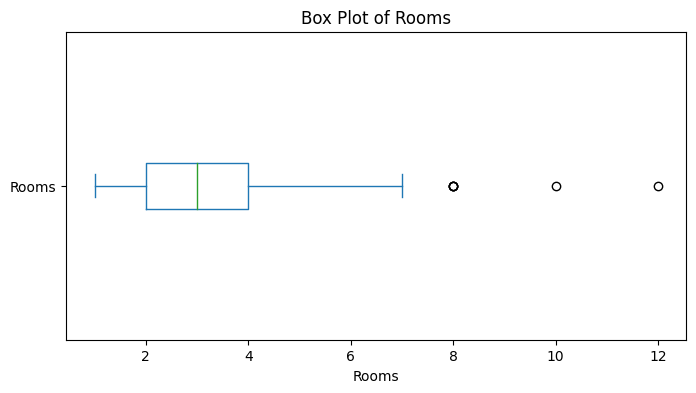

count    8.887000e+03
mean     1.092902e+06
std      6.793819e+05
min      1.310000e+05
5%       4.176500e+05
10%      4.900000e+05
20%      6.000000e+05
30%      6.900000e+05
40%      7.900000e+05
50%      9.000000e+05
60%      1.050000e+06
70%      1.250000e+06
80%      1.479800e+06
90%      1.900000e+06
95%      2.370700e+06
99%      3.550000e+06
max      9.000000e+06
Name: Price, dtype: float64


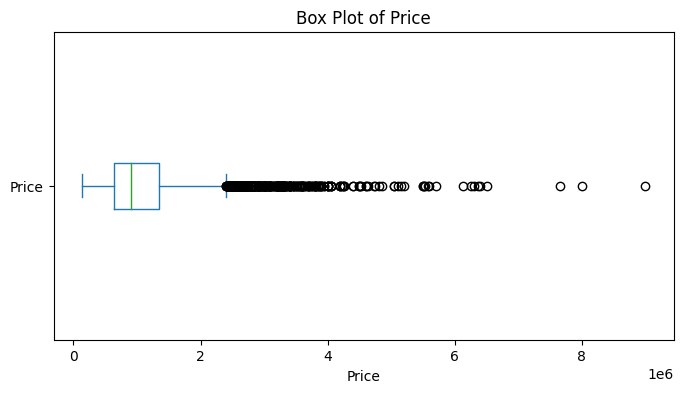

count    8887.000000
mean       11.199887
std         6.813402
min         0.000000
5%          2.600000
10%         4.200000
20%         5.900000
30%         7.200000
40%         8.400000
50%        10.200000
60%        11.400000
70%        13.400000
80%        14.700000
90%        19.900000
95%        24.700000
99%        35.400000
max        47.400000
Name: Distance, dtype: float64


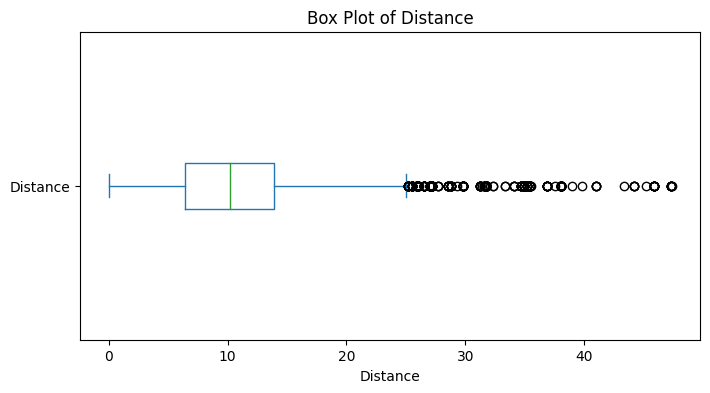

count    8887.000000
mean     3111.662653
std       112.614268
min      3000.000000
5%       3013.000000
10%      3020.000000
20%      3039.000000
30%      3054.000000
40%      3070.000000
50%      3084.000000
60%      3121.000000
70%      3143.000000
80%      3166.000000
90%      3189.000000
95%      3205.000000
99%      3754.000000
max      3977.000000
Name: Postcode, dtype: float64


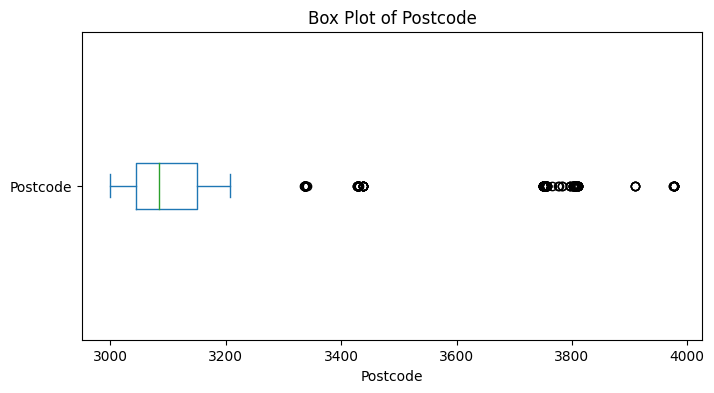

count    8887.000000
mean        3.078204
std         0.966269
min         0.000000
5%          2.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         4.000000
95%         5.000000
99%         5.000000
max        12.000000
Name: Bedroom2, dtype: float64


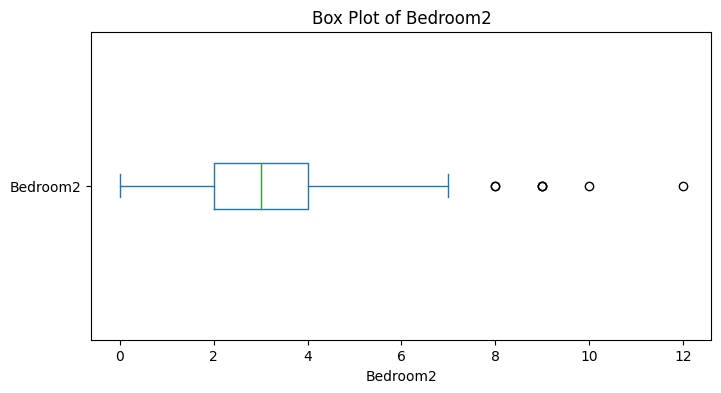

count    8887.000000
mean        1.646450
std         0.721611
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         2.000000
95%         3.000000
99%         4.000000
max         9.000000
Name: Bathroom, dtype: float64


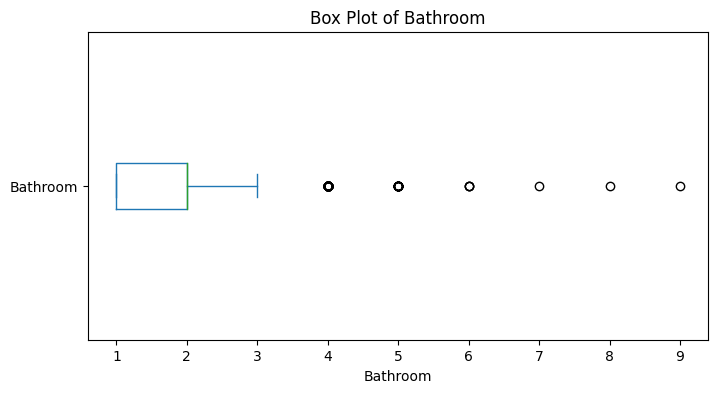

count    8887.000000
mean        1.692247
std         0.975464
min         0.000000
5%          0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         3.000000
95%         4.000000
99%         5.000000
max        10.000000
Name: Car, dtype: float64


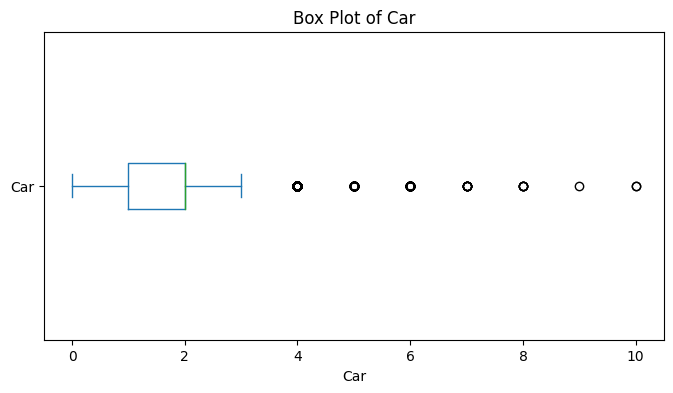

count     8887.000000
mean       523.480365
std       1061.324228
min          0.000000
5%           0.000000
10%          0.000000
20%        166.200000
30%        260.000000
40%        357.000000
50%        478.000000
60%        566.000000
70%        619.000000
80%        688.000000
90%        794.000000
95%        951.000000
99%       2573.940000
max      42800.000000
Name: Landsize, dtype: float64


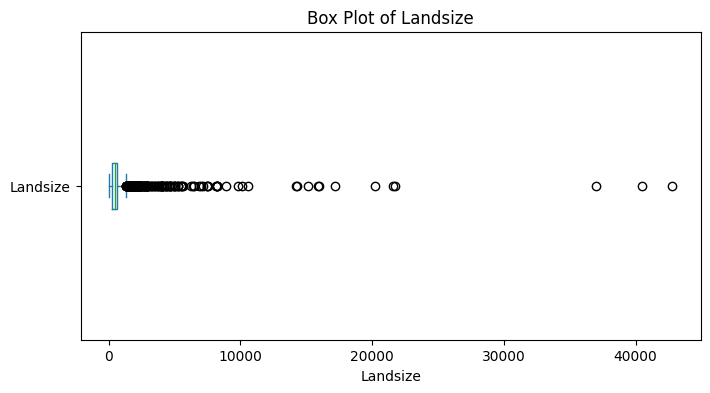

count    8887.000000
mean      149.309477
std        87.925580
min         0.000000
5%         57.000000
10%        72.000000
20%        92.000000
30%       106.000000
40%       119.000000
50%       132.000000
60%       148.000000
70%       168.000000
80%       195.077120
90%       244.000000
95%       296.000000
99%       426.140000
max      3112.000000
Name: BuildingArea, dtype: float64


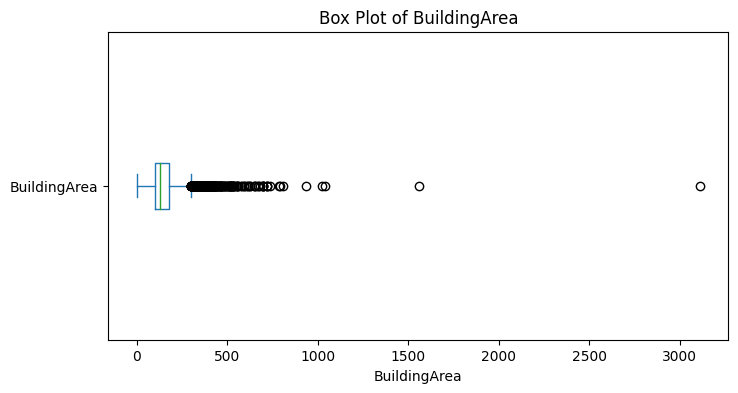

count    8887.000000
mean     1965.753348
std        37.040876
min      1196.000000
5%       1900.000000
10%      1910.000000
20%      1930.000000
30%      1950.000000
40%      1960.000000
50%      1970.000000
60%      1980.000000
70%      1992.000000
80%      2003.000000
90%      2010.000000
95%      2013.000000
99%      2016.000000
max      2019.000000
Name: YearBuilt, dtype: float64


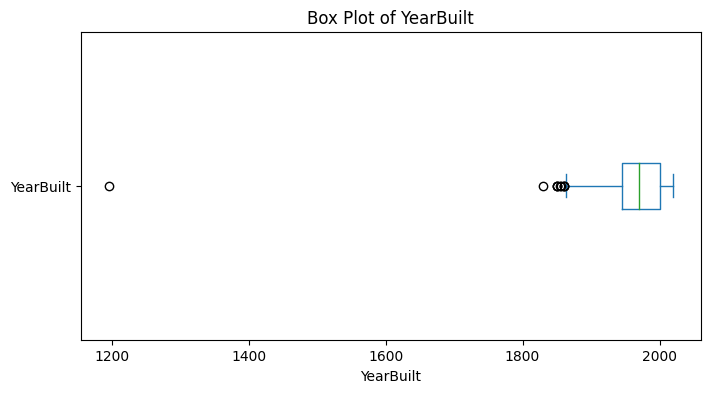

count    8887.000000
mean      -37.804501
std         0.090549
min       -38.174360
5%        -37.941870
10%       -37.914000
20%       -37.873688
30%       -37.845900
40%       -37.822000
50%       -37.798700
60%       -37.779600
70%       -37.760292
80%       -37.735672
90%       -37.703080
95%       -37.666769
99%       -37.582080
max       -37.407200
Name: Lattitude, dtype: float64


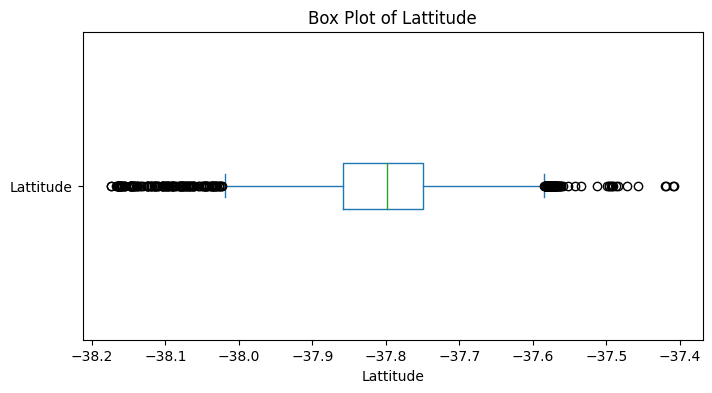

count    8887.000000
mean      144.991393
std         0.118919
min       144.423790
5%        144.795128
10%       144.867100
20%       144.898900
30%       144.937680
40%       144.973276
50%       144.998500
60%       145.021000
70%       145.050052
80%       145.080324
90%       145.123708
95%       145.172165
99%       145.286911
max       145.526350
Name: Longtitude, dtype: float64


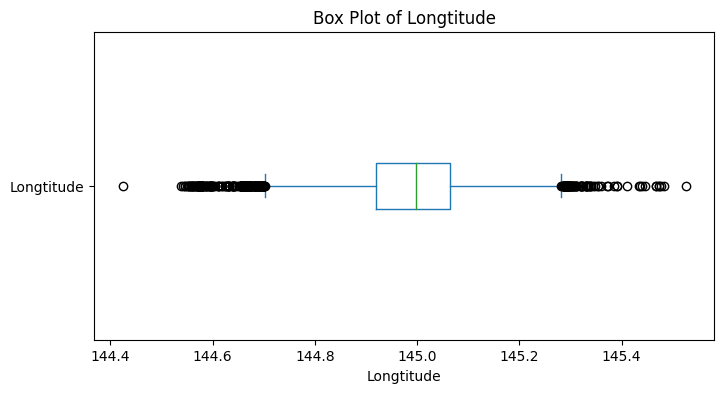

count     8887.000000
mean      7475.940137
std       4375.024364
min        249.000000
5%        2019.000000
10%       2651.000000
20%       3593.000000
30%       4864.000000
40%       5549.000000
50%       6567.000000
60%       7717.000000
70%       8920.000000
80%      10969.000000
90%      14092.000000
95%      15510.000000
99%      21650.000000
max      21650.000000
Name: Propertycount, dtype: float64


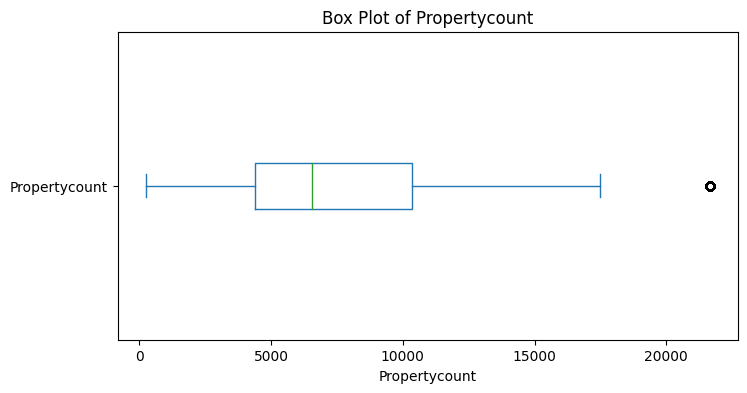

In [67]:
def num_summary_boxplot(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    # Display summary statistics
    summary = dataframe[numerical_col].describe(quantiles).T
    print(summary)

    if plot:
        plt.figure(figsize=(8, 4))
        dataframe[numerical_col].plot(kind='box', vert=False)
        plt.xlabel(numerical_col)
        plt.title(f'Box Plot of {numerical_col}')
        plt.show()

%matplotlib inline
for col in num_cols:
  if check_outlier(df, col) == True:
    num_summary_boxplot(df, col, plot=True)

Outliers are mostly in 'Landsize' and 'BuildingArea'. We can suppress them by using the cell below but there might be no difference if we do.

In [68]:
# Calculate z-scores for 'Landsize' and 'BuildingArea' columns
z_scores = zscore(df[['Landsize', 'BuildingArea']])

# Define the z-score threshold to identify outliers
z_threshold = 3

# Identify the rows with z-scores exceeding the threshold
outlier_indices = np.where(np.abs(z_scores) > z_threshold)

# Get the row indices of the outliers
outlier_indices = outlier_indices[0]

# Remove the identified outliers from the DataFrame
df_clean = df.drop(df.index[outlier_indices])

# Reset the index of the modified DataFrame
df_clean = df_clean.reset_index(drop=True)

In [69]:
print("df:",df.shape)
print("df_clean:",df_clean.shape)

df: (8887, 21)
df_clean: (8724, 21)


Let's visualize again.

count    8724.000000
mean      459.767882
std       346.503207
min         0.000000
5%          0.000000
10%         0.000000
20%       163.000000
30%       254.000000
40%       350.000000
50%       468.000000
60%       560.000000
70%       614.000000
80%       680.000000
90%       780.000000
95%       914.000000
99%      1704.630000
max      3701.000000
Name: Landsize, dtype: float64


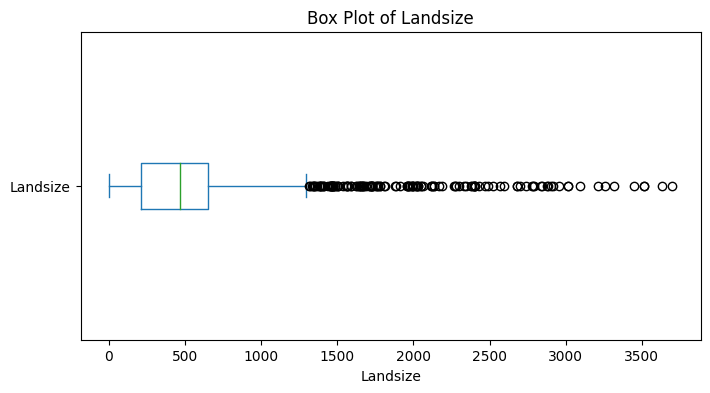

count    8724.000000
mean      144.479938
std        67.956485
min         0.000000
5%         56.000000
10%        72.000000
20%        92.000000
30%       106.000000
40%       118.000000
50%       131.000000
60%       147.000000
70%       166.000000
80%       192.000000
90%       237.000000
95%       280.000000
99%       355.000000
max       413.000000
Name: BuildingArea, dtype: float64


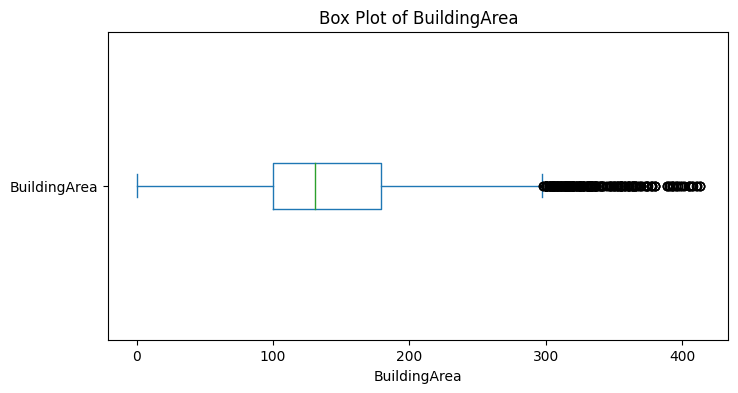

In [70]:
%matplotlib inline
for col in ['Landsize', 'BuildingArea']:
  if check_outlier(df_clean, col) == True:
    num_summary_boxplot(df_clean, col, plot=True)

There is not much difference between outlier-free and normal datasets. We will continue using the normal df. (I actually trained models with outliers suppressed and not suppressed, the score was higher when outliers were not suppressed.)

# Data Visualization

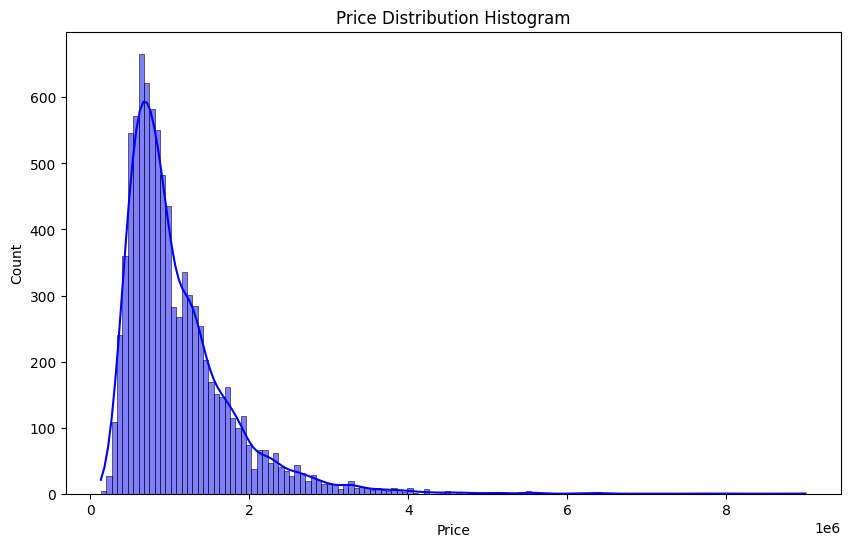

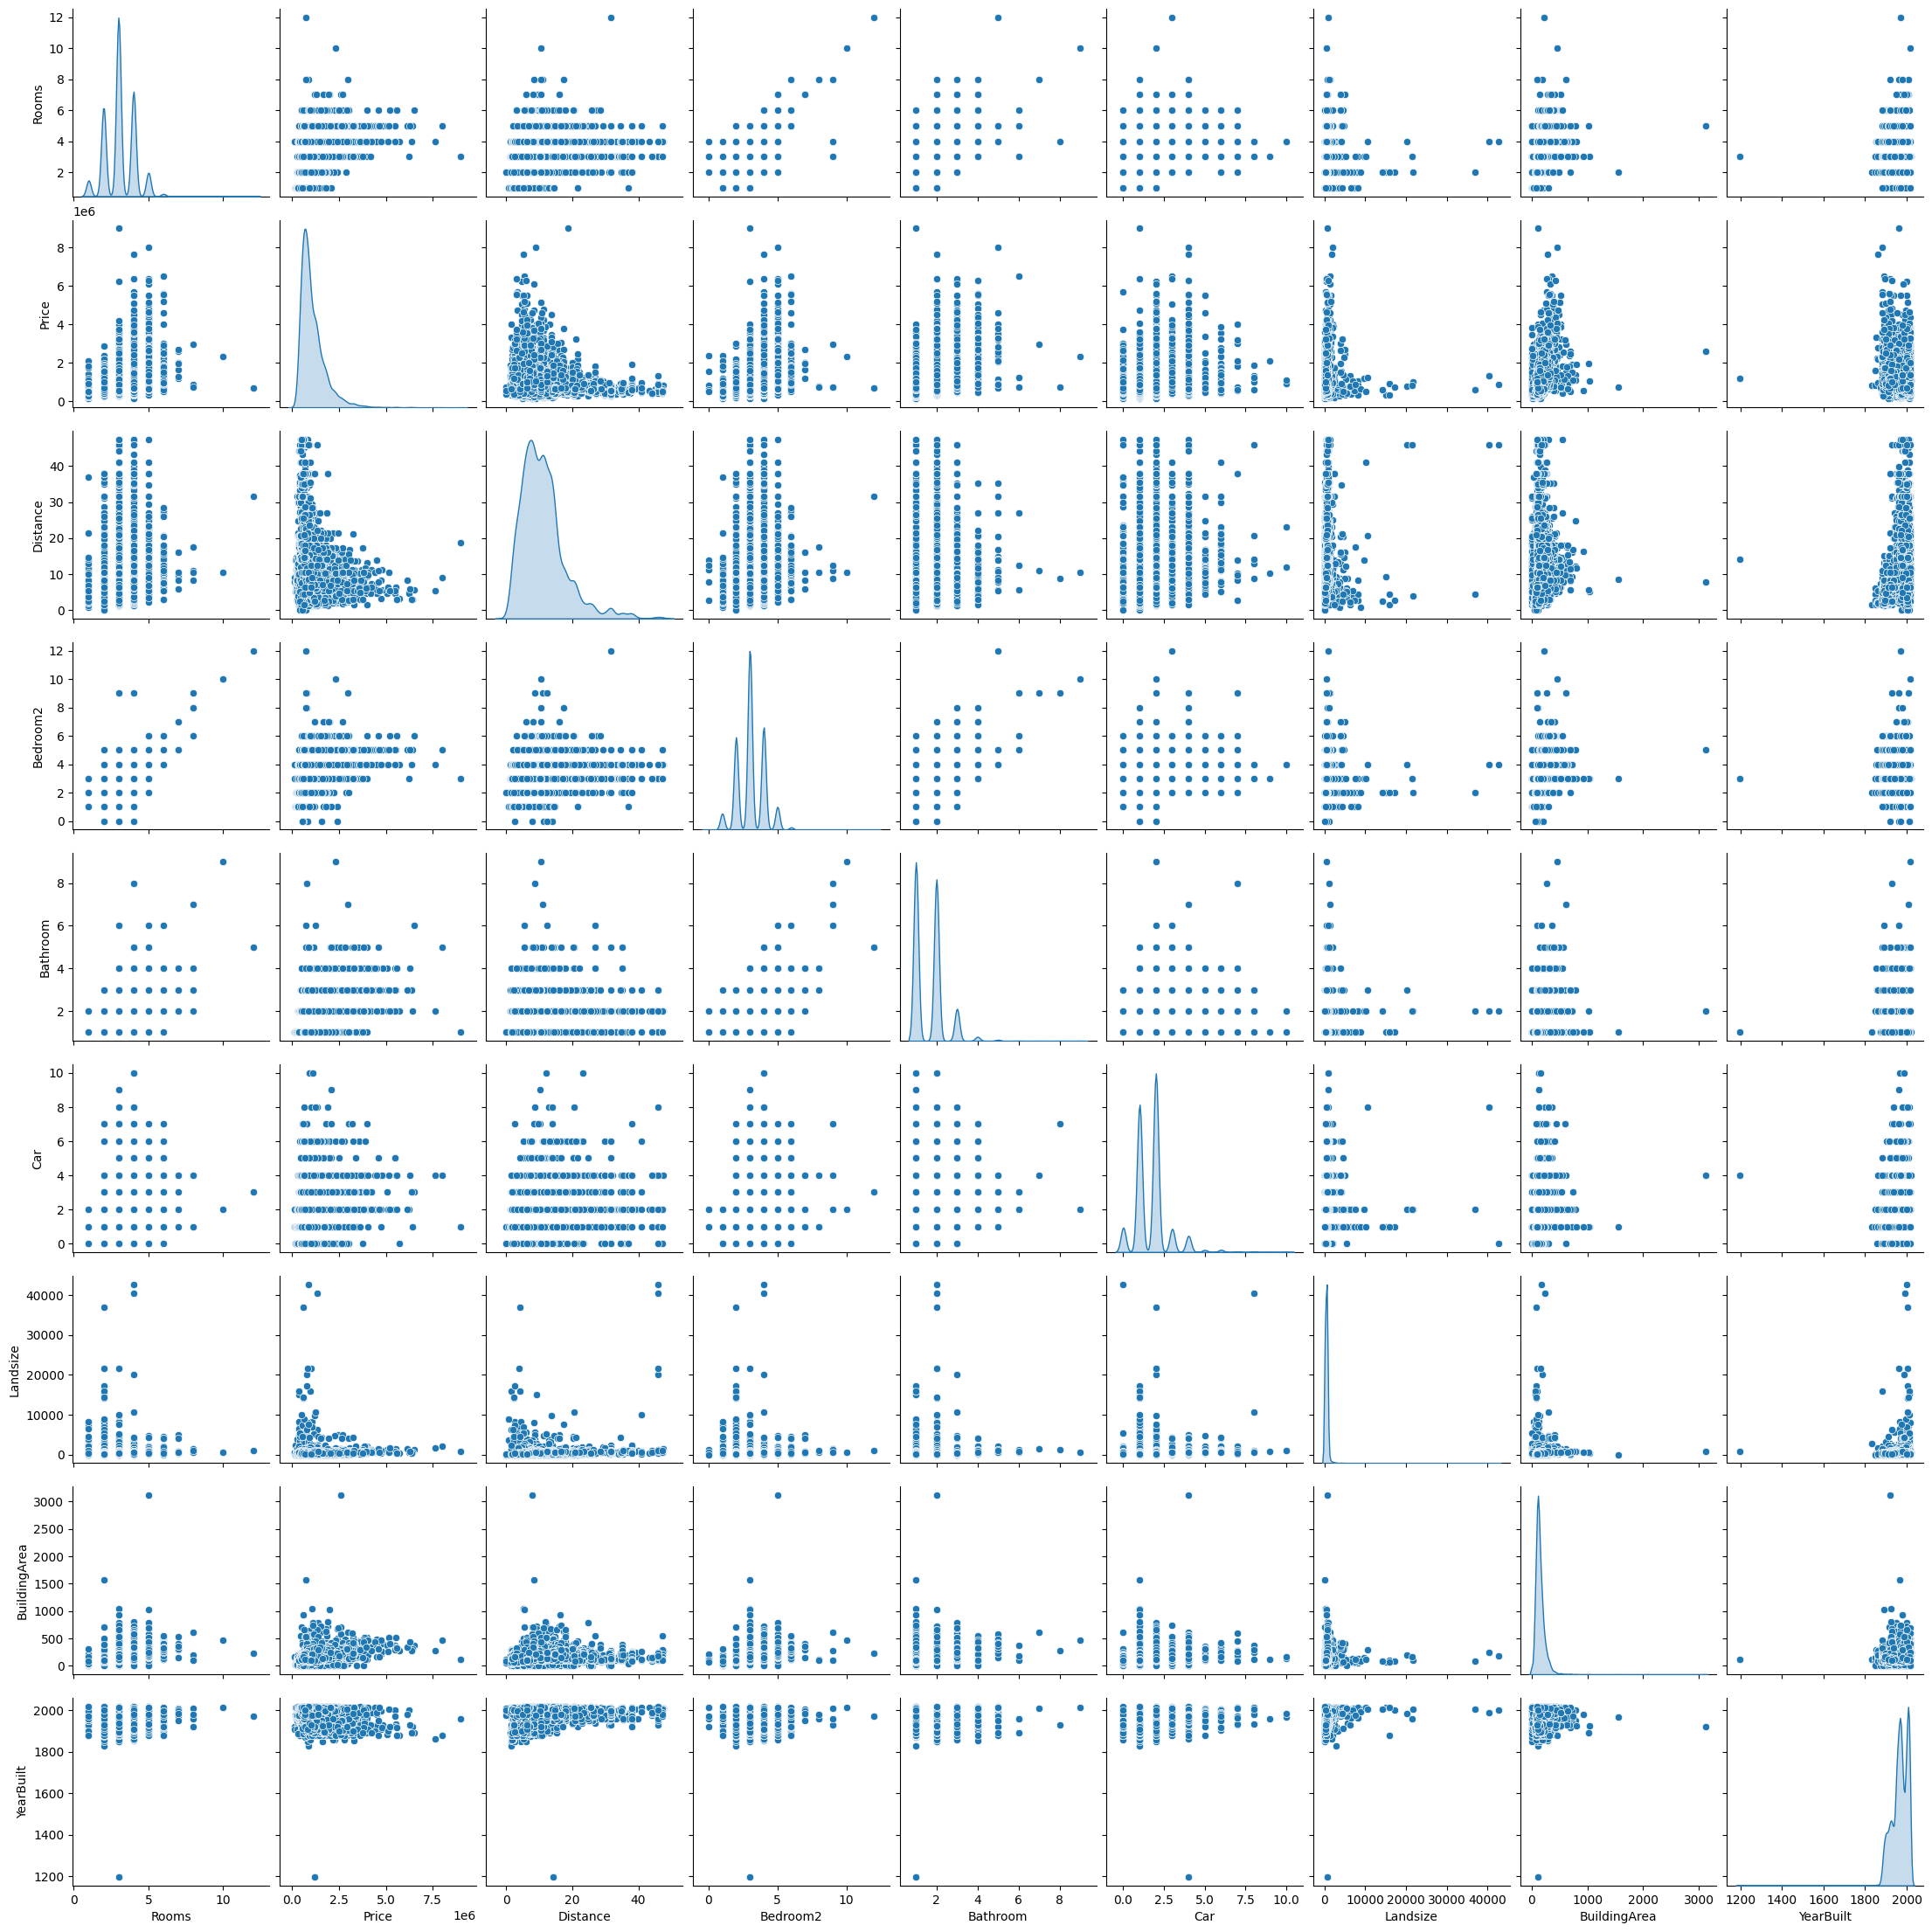

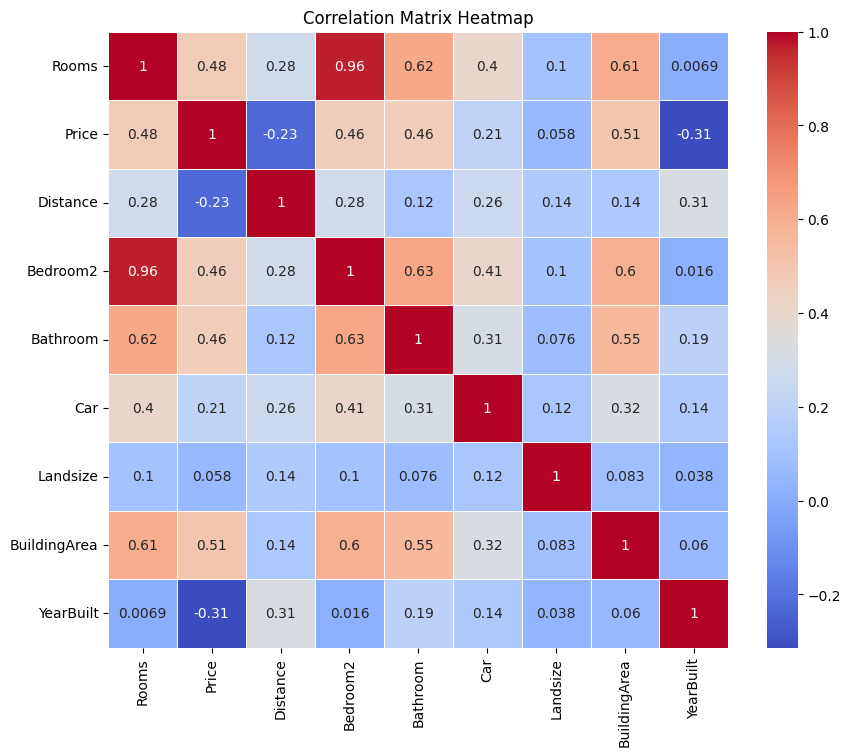

In [71]:
# Build a Histogram to visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.xlabel('Price')
plt.title('Price Distribution Histogram')
plt.show()

# Draw a pair plot to see the relationship between numerical variables and price
num_vars = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
sns.pairplot(df[num_vars], diag_kind='kde', kind='scatter')
plt.show()

# Draw a correlation matrix using a heatmap
correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Variables "Rooms", "Bedroom2", "Bathroom", "YearBuilt", "BuildingArea" seems to have high correlation with the target variable "Price".

# Splitting train and test dataframes

We will apply log1p transformation to our target variable "Price", because it has some large values like 10000000, 9000000 etc. We have to normalize its values.

In [72]:
df["Price"] = np.log1p(df["Price"]) # np.expm1() to reverse np.log1p()

Let's drop our target variable from num_cols.

In [73]:
num_cols = [col for col in num_cols if col != 'Price']

Let's split our data to train and test datasets.

In [74]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Price.values
y_test = df_test.Price.values

del df_train["Price"]
del df_test["Price"]

Let's implement Dict Vectorizer.

In [75]:
dv = DictVectorizer(sparse=True)
train_dicts = df_train[num_cols].to_dict(orient="records")

X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(df_test[df_test.columns].to_dict(orient='records'))

# Model Selection and Evaluation


Here are the models for us to try:

In [76]:
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}}

Needed functions for visualizing True vs Predicted values are below, they are used in train_and_evaluate_models().

In [126]:
def plot_predictions_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, c='b', s=5, label='True vs Predict')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Model: True vs Predict')
    plt.legend()
    plt.show()

def plot_predictions_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.plot(residuals, marker='o', linestyle='none', markersize=5)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel('Samples')
    plt.ylabel('Errors (Residuals)')
    plt.title(f'{model_name} Model: Errors (Residuals)')
    plt.show()

def plot_predictions_normal(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(y_true, label='True Values', marker='o', linestyle='-', markersize=5)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='-', markersize=5)
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.title(f'{model_name} Model: True vs Predicted Values')
    plt.legend()
    plt.show()

def plot_predictions_kde(y_true, y_pred, model_name):
  fig, ax = plt.subplots()
  sns.kdeplot(y_test, color="r", label="Actual Values", ax=ax)
  sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax)
  plt.title(f"{model_name} Model:Actual(Red) Values vs Predicted(Blue) Values")
  ax.legend(['Actual(Red)', 'Predicted(Blue)'])
  plt.show()

We will use evaluation metrics MAE, MSE, RMSE, R2 to determine the best performing model.

Our function train_and_evaluate_models() will train different models and evaluate their performance by our evaluation metrics MAE, MSE, RMSE, R2.


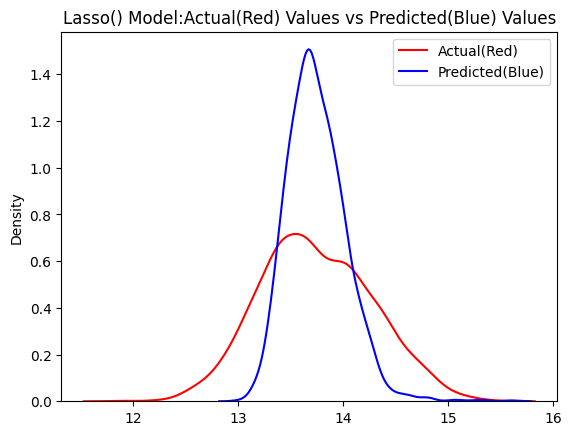

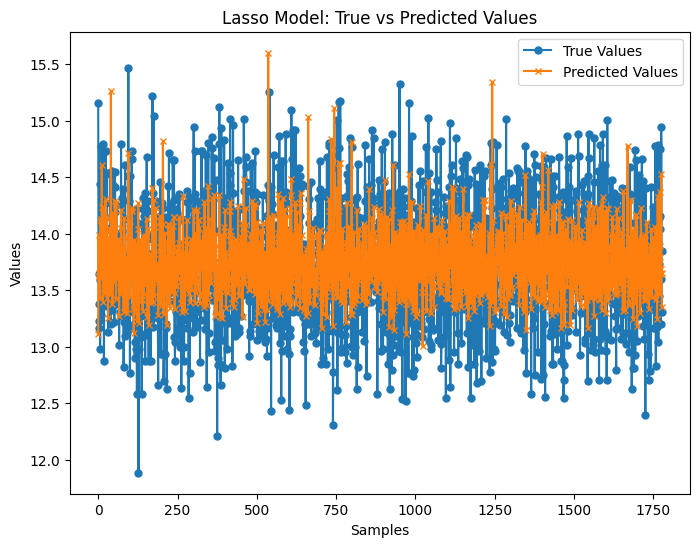

Model: Lasso
MAE: 0.30740860575569595
MSE: 0.15184108352504955
RMSE: 0.38966791441565923
R2 Score: 0.4641848436070345



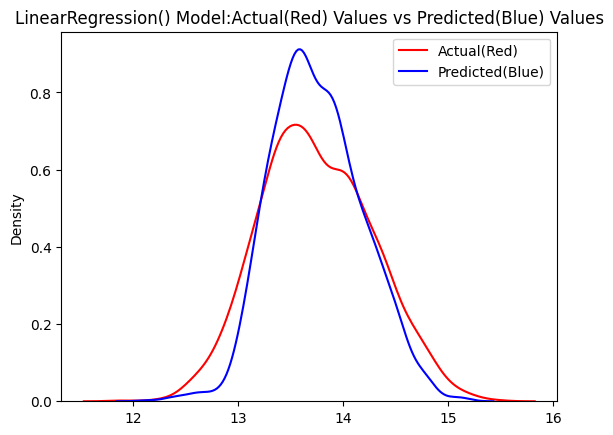

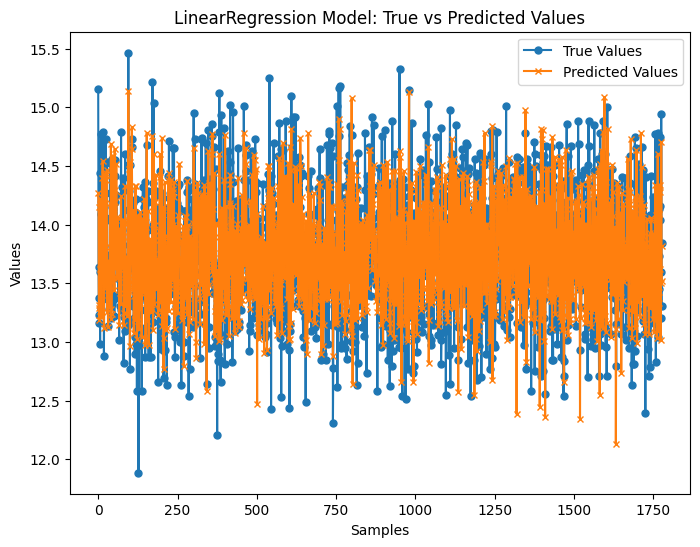

Model: LinearRegression
MAE: 0.22359058403761495
MSE: 0.08499189222185317
RMSE: 0.2915336896858632
R2 Score: 0.7000815394242528



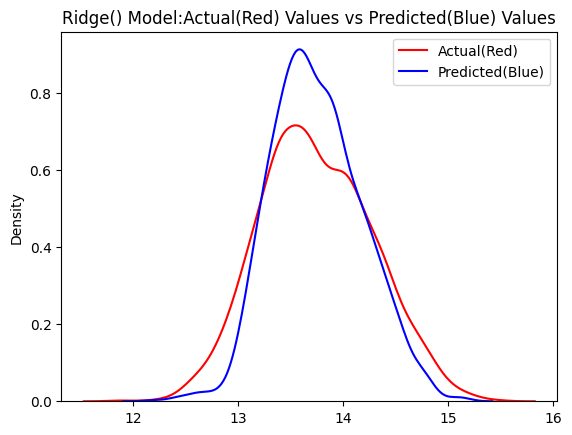

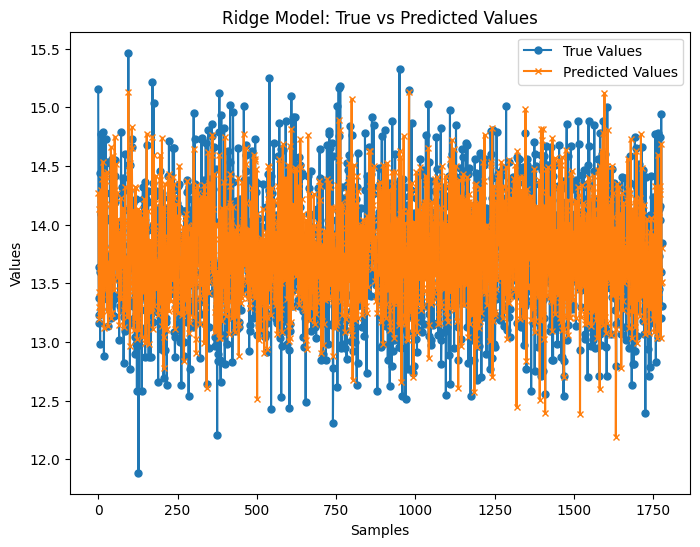

Model: Ridge
MAE: 0.22476095368004803
MSE: 0.0857259829282555
RMSE: 0.29278999799900185
R2 Score: 0.6974910881608256



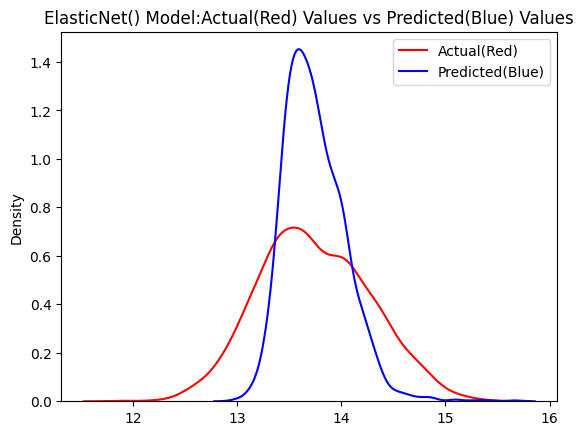

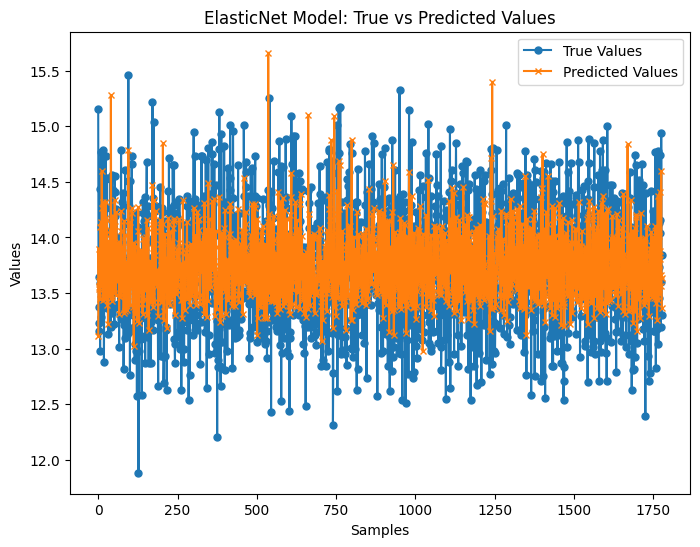

Model: ElasticNet
MAE: 0.29252276429495727
MSE: 0.14049432881893315
RMSE: 0.37482573126578855
R2 Score: 0.5042251476292815



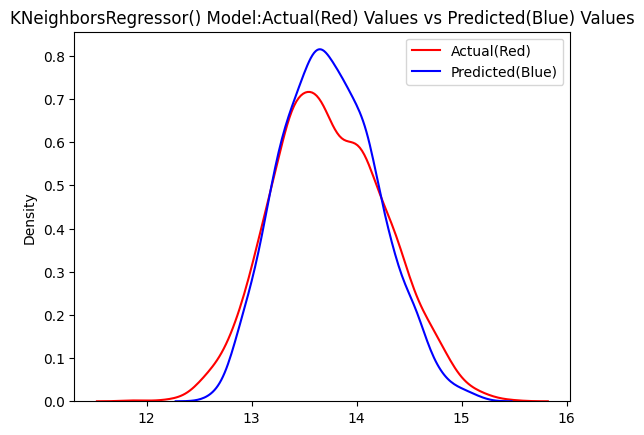

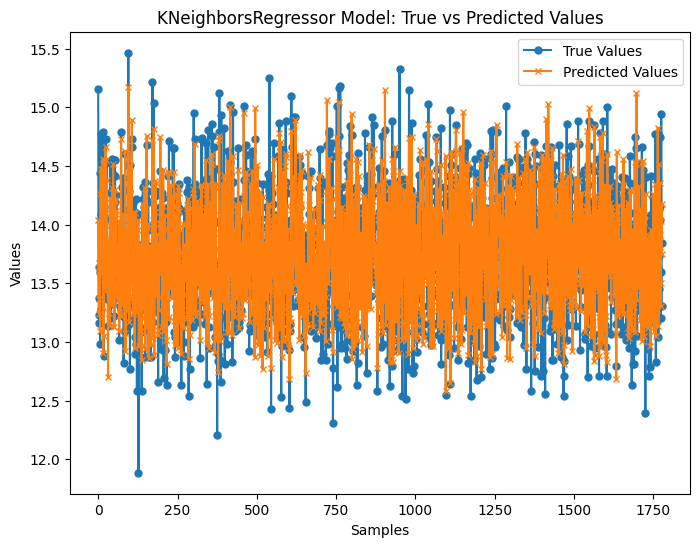

Model: KNeighborsRegressor
MAE: 0.2022120010066104
MSE: 0.08190942923379259
RMSE: 0.2861982341556156
R2 Score: 0.7109589011347988



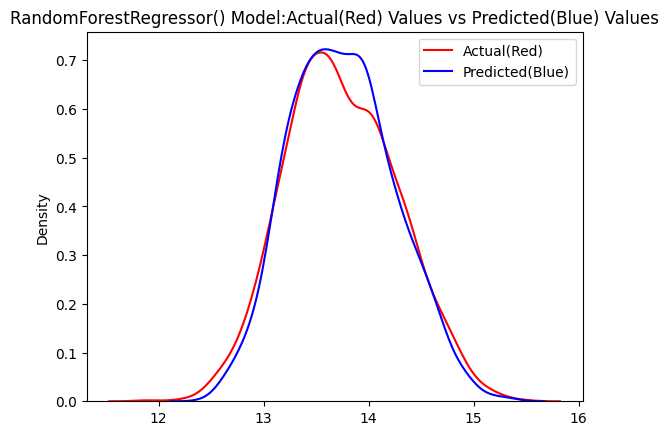

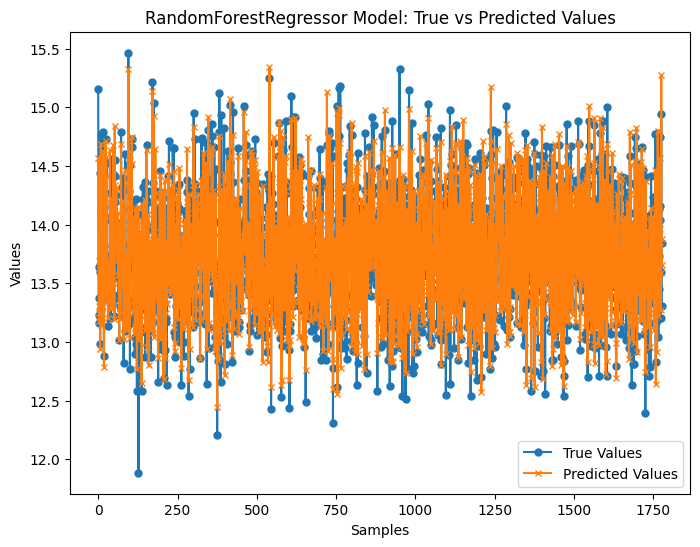

Model: RandomForestRegressor
MAE: 0.13438488541756524
MSE: 0.03390464286313254
RMSE: 0.18413213424911073
R2 Score: 0.8803576667367496



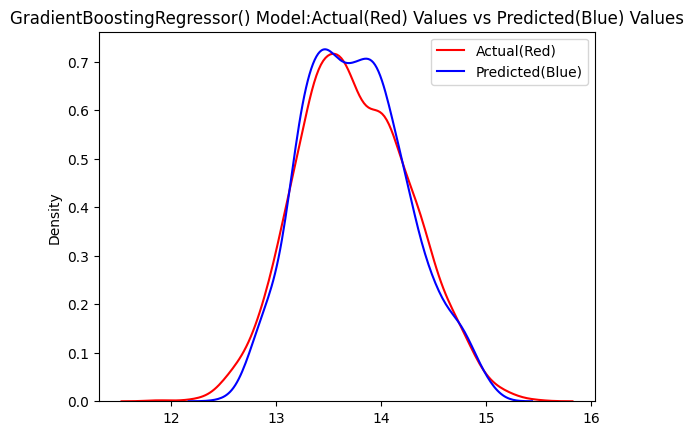

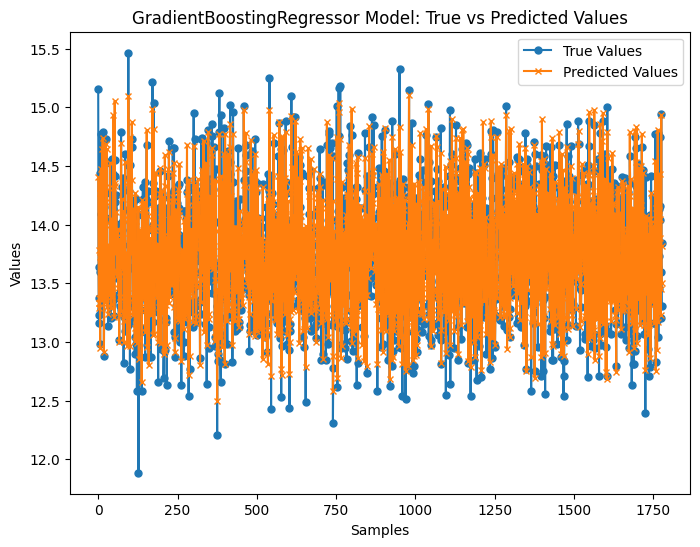

Model: GradientBoostingRegressor
MAE: 0.14402107484727827
MSE: 0.037468109573247775
RMSE: 0.19356680906924043
R2 Score: 0.86778294434769



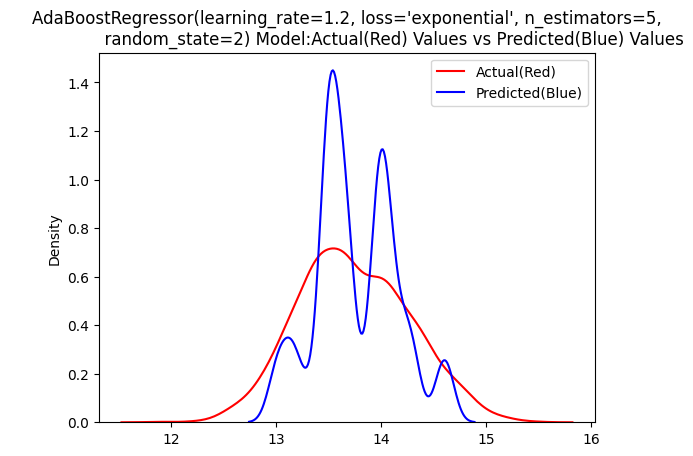

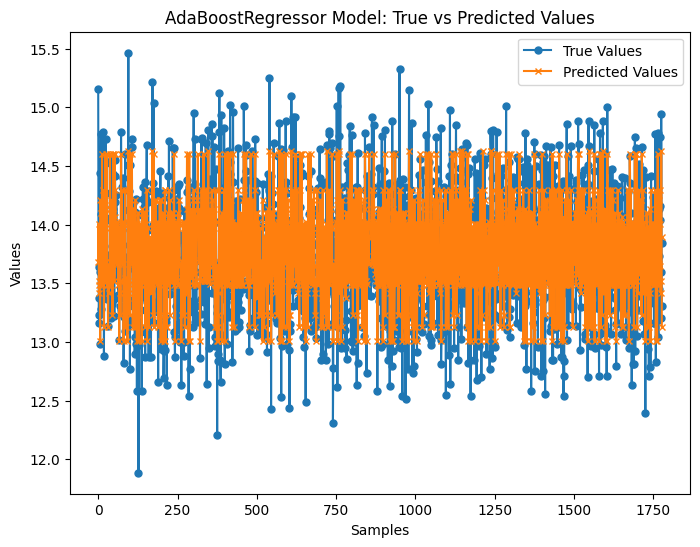

Model: AdaBoostRegressor
MAE: 0.23418416801328337
MSE: 0.09085808894290029
RMSE: 0.30142675551931397
R2 Score: 0.6793809685342852



In [127]:
def train_and_evaluate_models(models, X_train, X_test, y_train, y_test, scatterplot=False, normalplot=False, residualplot=False, kdeplot=False):
    """
    Trains the given models on a dataset and evaluates their performance.

    Parameters:
    - models: dict
        A dictionary of models to be trained.
        Example: {'Model Name': {'model': Model()}}
    - X_train: DataFrame or ndarray
        The data containing independent variables for training.
    - X_test: DataFrame or ndarray
        The data containing independent variables for testing.
    - y_train: Series or ndarray
        The dependent variable for training.
    - y_test: Series or ndarray
        The dependent variable for testing.
    - scatterplot: bool, optional
        If True, create scatterplots of actual vs. predicted values for each model.
    - normalplot: bool, optional
        If True, create normal distribution plots of residuals for each model.
    - residualplot: bool, optional
        If True, create residual plots for each model.

    Returns:
    - results: dict
        MAE, MSE, RMSE, and R2 scores for each model.

    """
    results = {}


    for model_name, model_config in models.items():
        model = model_config['model']
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if kdeplot:
            plot_predictions_kde(y_test, y_pred, model)
        if scatterplot:
            plot_predictions_scatter(y_test, y_pred, model)
        if residualplot:
            plot_predictions_residuals(y_test, y_pred, model_name)
        if normalplot:
            plot_predictions_normal(y_test, y_pred, model_name)
        # Calculate performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }

        print(f"Model: {model_name}")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R2 Score: {r2}")
        print("")

    return results


results = train_and_evaluate_models(models, X_train, X_test, y_train, y_test, normalplot=True, kdeplot=True)

We got the best results with RandomForestRegressor model.

We can tune its hyperparameters.

Let's start with max_depth.

In [79]:
best_result_max_depth = {"max_depth": 0, "RMSE": float("inf")}

for max_depth in range(10, 51, 5):
    rf = RandomForestRegressor(max_depth=max_depth, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"max_depth: {max_depth} | RMSE: {rmse:.7f}")

    if rmse < best_result_max_depth["RMSE"]:
        best_result_max_depth["max_depth"] = max_depth
        best_result_max_depth["RMSE"] = rmse

print(f"Best result: max_depth={best_result_max_depth['max_depth']}, RMSE={best_result_max_depth['RMSE']:.7f}")

max_depth: 10 | RMSE: 0.1940716
max_depth: 15 | RMSE: 0.1850154
max_depth: 20 | RMSE: 0.1840996
max_depth: 25 | RMSE: 0.1845538
max_depth: 30 | RMSE: 0.1846234
max_depth: 35 | RMSE: 0.1845563
max_depth: 40 | RMSE: 0.1845514
max_depth: 45 | RMSE: 0.1845514
max_depth: 50 | RMSE: 0.1845514
Best result: max_depth=20, RMSE=0.1840996


Let's tune n_estimators.

In [80]:
best_result_n_estimators = {"n_estimators": 0, "RMSE": float("inf")}

for n_estimators in range(10, 101, 10):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"n_estimators: {n_estimators} | RMSE: {rmse:.7f}")

    if rmse < best_result_n_estimators["RMSE"]:
        best_result_n_estimators["n_estimators"] = n_estimators
        best_result_n_estimators["RMSE"] = rmse

print(f"Best result: n_estimators={best_result_n_estimators['n_estimators']}, RMSE={best_result_n_estimators['RMSE']:.7f}")

n_estimators: 10 | RMSE: 0.1952085
n_estimators: 20 | RMSE: 0.1891351
n_estimators: 30 | RMSE: 0.1874420
n_estimators: 40 | RMSE: 0.1853380
n_estimators: 50 | RMSE: 0.1853638
n_estimators: 60 | RMSE: 0.1855743
n_estimators: 70 | RMSE: 0.1850783
n_estimators: 80 | RMSE: 0.1845241
n_estimators: 90 | RMSE: 0.1844218
n_estimators: 100 | RMSE: 0.1845514
Best result: n_estimators=90, RMSE=0.1844218


Let's train our model with the best parameters and evaluate it's performance.

In [81]:
rf = RandomForestRegressor(n_estimators=best_result_n_estimators["n_estimators"], max_depth=best_result_max_depth["max_depth"], random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Model: RandomForestRegressor")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Model: RandomForestRegressor
MAE: 0.1340524990064173
MSE: 0.03385558244074385
RMSE: 0.18399886532460968
R2 Score: 0.8805307906191973


We will use Cross Validation to ensure that our model is not overfitted.

In [82]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

print("RMSE Values:", rmse_scores)

print("Mean RMSE:", rmse_scores.mean())

RMSE Values: [0.17962955 0.20706505 0.18715363 0.19680724 0.20408843]
Mean RMSE: 0.19494877952750744


Seems alright.

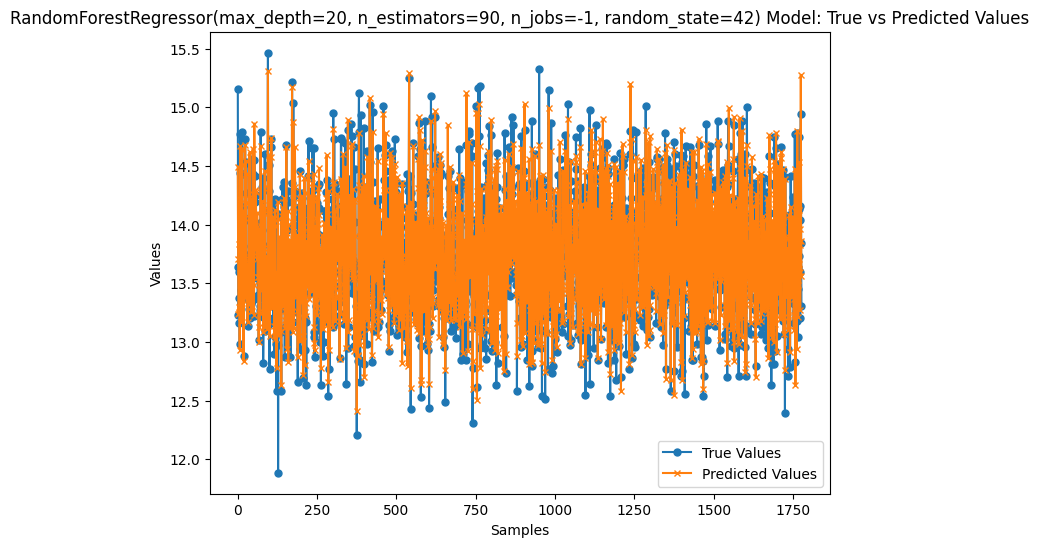

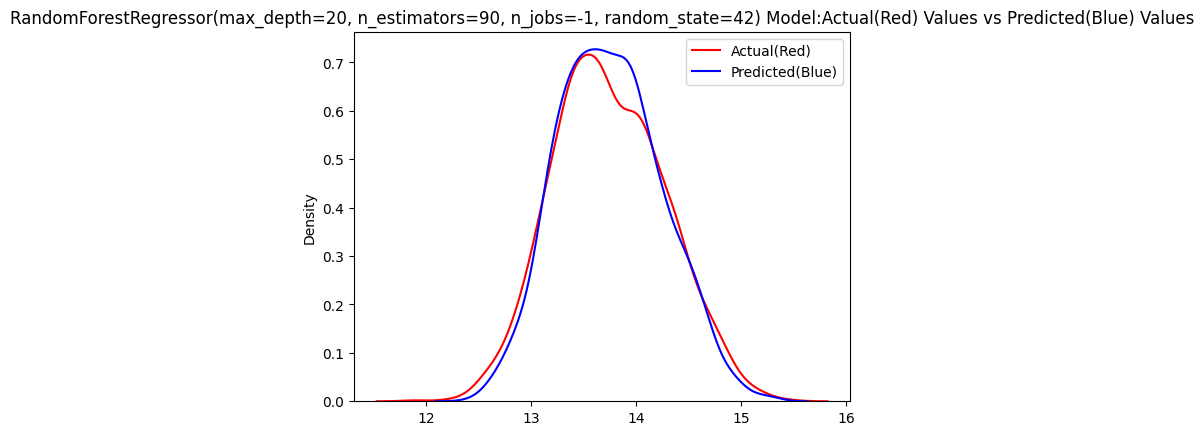

In [129]:
plot_predictions_normal(y_test, y_pred, rf)

plot_predictions_kde(y_test, y_pred, rf)

Our model fits the data well.

Let's try our model with a sample!

In [84]:
import random
random_index = random.randint(0, X_test.shape[0] - 1)


sample_X = X_test[random_index].reshape(1, -1)
print(sample_X)
predicted_value = rf.predict(sample_X)

print("\n\nTrue Value:", np.expm1(y_test[random_index]))
print("Predicted Value:", np.expm1(predicted_value[0]))

  (0, 0)	1.0
  (0, 1)	3.0
  (0, 2)	129.0
  (0, 3)	2.0
  (0, 4)	16.5
  (0, 5)	531.0
  (0, 6)	-37.67978
  (0, 7)	144.87342
  (0, 8)	3049.0
  (0, 9)	2474.0
  (0, 10)	3.0
  (0, 11)	1980.0


True Value: 620000.0000000005
Predicted Value: 574639.341300238


We can look at feature importances.

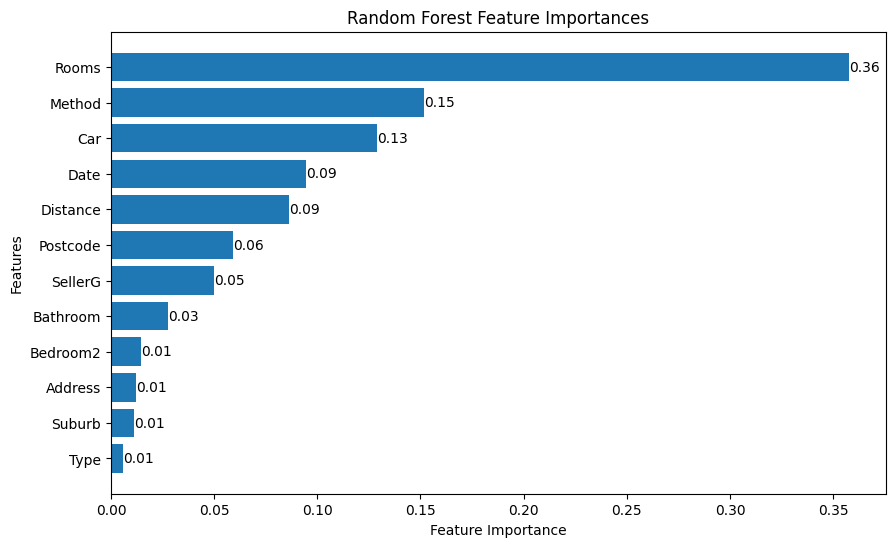

In [85]:
feature_importances = rf.feature_importances_

feature_names = df_train.columns

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")

for i, v in enumerate(feature_importances[sorted_idx]):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.show()

#TO-DO

* Further hyperparameter optimizations can be done.
* Different models can be trained (like XGBoost, LightGBM, etc.).
* Scaling and Normalization techniques can be tested.
* Missing values can be filled with KNNImputer or SimpleImputer.
* Different visualizations can be done.
* Ensemble Learning can be done.
* There are better options than using Z-Score for outlier detection.
* The model can be extracted and deployed with Flask.
* Feature Engineering can be done with high correlated variables.






#**Thanks for viewing my notebook!**
